<a href="https://colab.research.google.com/github/jeevanvishwa02/Data_Science/blob/main/Time_Series_Forecasting_using_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## RNN Implementation

A weather-based energy forecasting homework.Energy demand forecasting as a function of weather data is an extremely interesting and relevant topic.

## Import the Packages

In [ ]:
# standard modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# RNN-specific modules
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report,accuracy_score
from tensorflow.keras import layers, Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D
from tensorflow.keras.layers import Dense, Dropout, SimpleRNN, GRU, LSTM, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping

## Import the data

In [ ]:
# https://drive.google.com/file/d/1xYe3vCKTLeaJKpMDzv57ppCSWK_LCJ5V/view?usp=sharing
!gdown 1xYe3vCKTLeaJKpMDzv57ppCSWK_LCJ5V

Downloading...
From: https://drive.google.com/uc?id=1xYe3vCKTLeaJKpMDzv57ppCSWK_LCJ5V
To: /content/BDL_cleanweather_energy (1).csv
100% 7.38M/7.38M [00:00<00:00, 179MB/s]


In [ ]:
import pandas as pd
df = pd.read_csv('BDL_cleanweather_energy (1).csv')

## Data Description and Dictionary

In [ ]:
print("There are", len(df),"rows and",len(df.columns),"columns in the dataset")

There are 96427 rows and 11 columns in the dataset


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96427 entries, 0 to 96426
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Datetime  96427 non-null  object 
 1   Demand    96427 non-null  float64
 2   BDL_tmpf  96160 non-null  float64
 3   BDL_dwpf  96160 non-null  float64
 4   BDL_relh  96160 non-null  float64
 5   BDL_drct  96160 non-null  float64
 6   BDL_sknt  96160 non-null  float64
 7   BDL_p01i  96160 non-null  float64
 8   BDL_alti  96160 non-null  float64
 9   BDL_mslp  96160 non-null  float64
 10  BDL_vsby  96160 non-null  float64
dtypes: float64(10), object(1)
memory usage: 8.1+ MB


**Check sample data**

In [ ]:
df.head(n=5)

,Datetime,Demand,BDL_tmpf,BDL_dwpf,BDL_relh,BDL_drct,BDL_sknt,BDL_p01i,BDL_alti,BDL_mslp,BDL_vsby
0,2019-01-01 00:00:00,2713.617,37.9,37.9,100.0,360.0,4.0,0.0700,29.88,1009.7,5.0
1,2019-01-01 01:00:00,2578.343,37.9,37.9,100.0,360.0,4.0,0.1100,29.79,1006.3,2.0
2,2019-01-01 02:00:00,2467.969,37.9,37.9,100.0,340.0,7.0,0.0100,29.70,1003.3,2.0
3,2019-01-01 03:00:00,2397.140,37.9,37.9,100.0,310.0,6.0,0.0100,29.63,1002.3,1.5
4,2019-01-01 04:00:00,2381.258,37.9,37.9,100.0,140.0,3.0,0.0001,29.58,1001.2,1.5


**Understanding of Columns**


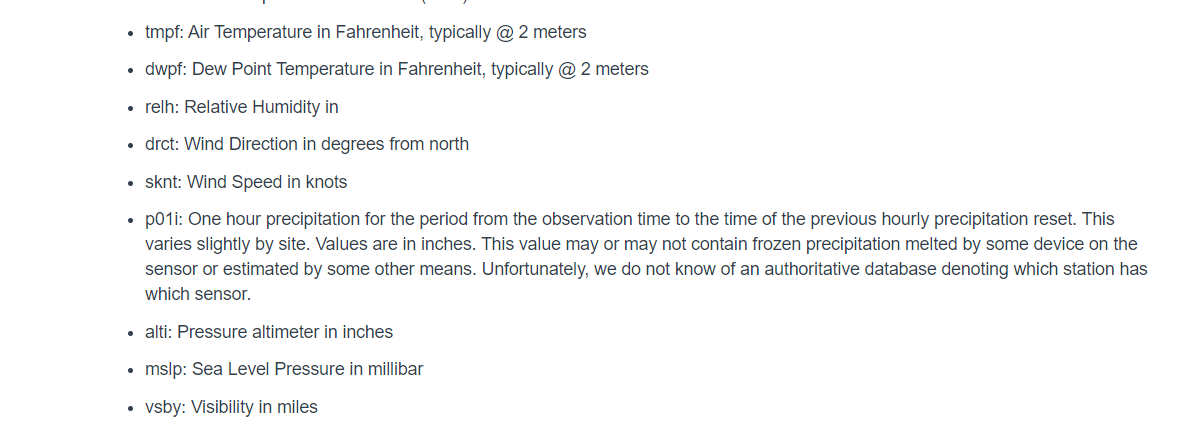


https://ropensci.github.io/riem/reference/riem_measures.html

This dataset gives us hourly information about energy and weather of BDL 

## Sorting


In [ ]:
#Change the date column to datetime data type
df['Datetime'] = pd.to_datetime(df['Datetime'])

In [ ]:
#check datatype of first row
print(type(df.Datetime[0]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [ ]:
df.head()

,Datetime,Demand,BDL_tmpf,BDL_dwpf,BDL_relh,BDL_drct,BDL_sknt,BDL_p01i,BDL_alti,BDL_mslp,BDL_vsby
0,2019-01-01 00:00:00,2713.617,37.9,37.9,100.0,360.0,4.0,0.0700,29.88,1009.7,5.0
1,2019-01-01 01:00:00,2578.343,37.9,37.9,100.0,360.0,4.0,0.1100,29.79,1006.3,2.0
2,2019-01-01 02:00:00,2467.969,37.9,37.9,100.0,340.0,7.0,0.0100,29.70,1003.3,2.0
3,2019-01-01 03:00:00,2397.140,37.9,37.9,100.0,310.0,6.0,0.0100,29.63,1002.3,1.5
4,2019-01-01 04:00:00,2381.258,37.9,37.9,100.0,140.0,3.0,0.0001,29.58,1001.2,1.5


In [ ]:
#Sorting
df=df.sort_values(by='Datetime')

In [ ]:
df.head()

,Datetime,Demand,BDL_tmpf,BDL_dwpf,BDL_relh,BDL_drct,BDL_sknt,BDL_p01i,BDL_alti,BDL_mslp,BDL_vsby
8760,2011-01-01 00:00:00,3053.0,33.98,26.96,0.0,0.0,0.0,0.0,30.07,1018.5,6.0
8761,2011-01-01 01:00:00,2892.0,33.98,26.96,0.0,0.0,0.0,0.0,30.07,1018.5,6.0
8762,2011-01-01 02:00:00,2774.0,30.92,26.96,0.0,0.0,0.0,0.0,30.07,1018.6,6.0
8763,2011-01-01 03:00:00,2710.0,30.02,26.06,0.0,0.0,0.0,0.0,30.09,1019.2,5.0
8764,2011-01-01 04:00:00,2698.0,28.94,24.98,0.0,0.0,0.0,0.0,30.09,1019.1,5.0


In [ ]:
print("Min Time is",min(df['Datetime']))
print("Max Time is",max(df['Datetime']))

Min Time is 2011-01-01 00:00:00
Max Time is 2021-12-31 23:00:00


References: https://www.geeksforgeeks.org/how-to-sort-a-pandas-dataframe-by-date/

## Exploration

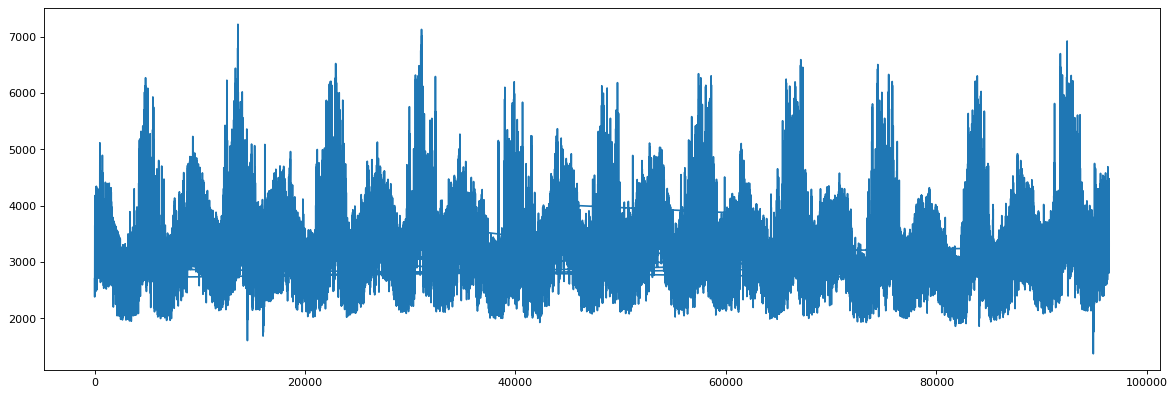

In [ ]:
from matplotlib.pyplot import figure

figure(figsize=(18, 6), dpi=80)
# visualize the data
df['Demand'].plot()
plt.show()

In [ ]:
# drop the date column
df.drop(['Datetime'], inplace=True, axis=1)
print(df.shape)
df.head()

(96427, 10)


,Demand,BDL_tmpf,BDL_dwpf,BDL_relh,BDL_drct,BDL_sknt,BDL_p01i,BDL_alti,BDL_mslp,BDL_vsby
8760,3053.0,33.98,26.96,0.0,0.0,0.0,0.0,30.07,1018.5,6.0
8761,2892.0,33.98,26.96,0.0,0.0,0.0,0.0,30.07,1018.5,6.0
8762,2774.0,30.92,26.96,0.0,0.0,0.0,0.0,30.07,1018.6,6.0
8763,2710.0,30.02,26.06,0.0,0.0,0.0,0.0,30.09,1019.2,5.0
8764,2698.0,28.94,24.98,0.0,0.0,0.0,0.0,30.09,1019.1,5.0


In [ ]:
df.columns

Index(['Demand', 'BDL_tmpf', 'BDL_dwpf', 'BDL_relh', 'BDL_drct', 'BDL_sknt',
       'BDL_p01i', 'BDL_alti', 'BDL_mslp', 'BDL_vsby'],
      dtype='object')

In [ ]:
#Move the dependent variable to the end
df=df[['BDL_tmpf', 'BDL_dwpf', 'BDL_relh', 'BDL_drct', 'BDL_sknt',
       'BDL_p01i', 'BDL_alti', 'BDL_mslp', 'BDL_vsby','Demand']]

In [ ]:
df.head()

,BDL_tmpf,BDL_dwpf,BDL_relh,BDL_drct,BDL_sknt,BDL_p01i,BDL_alti,BDL_mslp,BDL_vsby,Demand
8760,33.98,26.96,0.0,0.0,0.0,0.0,30.07,1018.5,6.0,3053.0
8761,33.98,26.96,0.0,0.0,0.0,0.0,30.07,1018.5,6.0,2892.0
8762,30.92,26.96,0.0,0.0,0.0,0.0,30.07,1018.6,6.0,2774.0
8763,30.02,26.06,0.0,0.0,0.0,0.0,30.09,1019.2,5.0,2710.0
8764,28.94,24.98,0.0,0.0,0.0,0.0,30.09,1019.1,5.0,2698.0


## Cleaning

### Missing Values

In [ ]:
df.isna().sum()

BDL_tmpf    267
BDL_dwpf    267
BDL_relh    267
BDL_drct    267
BDL_sknt    267
BDL_p01i    267
BDL_alti    267
BDL_mslp    267
BDL_vsby    267
Demand        0
dtype: int64

In [ ]:
print("There are total of",df.isna().sum().sum(),"missing values in the dataset")

There are total of 2403 missing values in the dataset


In [ ]:
#Check sample data of missing values
df[pd.isna(df["BDL_tmpf"])].head()

,BDL_tmpf,BDL_dwpf,BDL_relh,BDL_drct,BDL_sknt,BDL_p01i,BDL_alti,BDL_mslp,BDL_vsby,Demand
8771,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3325.0
9034,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4071.0
9169,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3209.0
9194,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2882.0
9220,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3030.0


In [ ]:
#Check if all columsn with 267 NULLs of similar rows
df[pd.isna(df["BDL_tmpf"])].isna().sum()

BDL_tmpf    267
BDL_dwpf    267
BDL_relh    267
BDL_drct    267
BDL_sknt    267
BDL_p01i    267
BDL_alti    267
BDL_mslp    267
BDL_vsby    267
Demand        0
dtype: int64

In [ ]:
print("There are total of",round(267*100/len(df),2),"pct of missing values in the dataset")

There are total of 0.28 pct of missing values in the dataset


All columns have missing values in same 267 rows. As this is hourly weather dataset and missing values are less than 0.5% in the dataset, we can safely replace missing values with 


1.   Weather information of previous hour
2.   Weather information of following hour

Removing missing values also should not impact dataset by much as it missing values are very low pct 



In [ ]:
df.isna().sum()

BDL_tmpf    267
BDL_dwpf    267
BDL_relh    267
BDL_drct    267
BDL_sknt    267
BDL_p01i    267
BDL_alti    267
BDL_mslp    267
BDL_vsby    267
Demand        0
dtype: int64

In [ ]:
# Fill NAs with previous value in the dataset. As dataset is already sorted, we can go ahead and replace it with previous value
df.fillna(method ='pad',inplace=True)

In [ ]:
#Check missing values after treatment
df.isna().sum()

BDL_tmpf    0
BDL_dwpf    0
BDL_relh    0
BDL_drct    0
BDL_sknt    0
BDL_p01i    0
BDL_alti    0
BDL_mslp    0
BDL_vsby    0
Demand      0
dtype: int64

### Outliers Check

In [ ]:
#Later

## 3D Tensor

In [ ]:
# prep data for modeling (multivariate)
# link: https://machinelearningmastery.com/how-to-develop-lstm-models-for-time-series-forecasting/

from numpy import array

# split a multivariate sequence into samples
def split_sequences(sequences, n_steps):
	X, y = list(), list()
	for i in np.arange(len(sequences)): # be careful of this line!
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the dataset
		if end_ix > len(sequences):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1, -1]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

Lookback

As the dataset is hourly, we could try look back 24 hours of data and use it for prediction of next set of row

In [ ]:
# Took this code from class example
# we could try weekly data too
n_steps = 24
raw_seq = np.array(df) # Store the data in numpy array
# let's ignore the date column and just use the temperature data
X, y = split_sequences(raw_seq, n_steps=24)

In [ ]:
# take a peak at what it did
print(X.shape)
print(y.shape)

# scroll up and make sure you understand this!
# y is a function of X (the previous n_steps observations!)

(96404, 24, 9)
(96404,)


In [ ]:
#confirm it with my understanding
print("Number of samples",len(df)-n_steps+1)
print("Lookback period",n_steps)
print("Number of features",len(df.columns)-1)

Number of samples 96404
Lookback period 24
Number of features 9


In [ ]:
print("Resultant Tensor has 96404 samples of size 24 and with 9 features")

Resultant Tensor has 96404 samples of size 24 and with 9 features


## RNN Model -1  

Training - 50K rows 
Test - 46K rows

Structure
1.   Two Recurrent layers
2.   One Convolution layer
3.   Drop out
4.   Max Pooling
5.   Activation Function





### Datasplit

In [ ]:
# split the data into train and test partitions
# we will use 50% of the data for train, and 50% for validation
train_pct_index = 50000
X_train, X_test = X[:train_pct_index], X[train_pct_index:]
y_train, y_test = y[:train_pct_index], y[train_pct_index:]

# pretty slick way of splitting your data using slicing!
# notice how we didn't do any shuffling (we don't want temporal leakage! keeps time series intact)

In [ ]:
# check the shape to be sure
print(X.shape, X_train.shape, X_test.shape)
print(y.shape, y_train.shape, y_test.shape)

# verify that this all adds up!
# 96404 samples with 24 lookback and 9 columns

(96404, 24, 9) (50000, 24, 9) (46404, 24, 9)
(96404,) (50000,) (46404,)


### Model Building

In [ ]:
# now let's build a model

# define
n_steps = X_train.shape[1]
n_features = X_train.shape[2]
kernel=3

# define model
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=kernel, input_shape=(n_steps,n_features))) # notice how input shape goes in first layer
model.add(MaxPooling1D(2))
model.add(SimpleRNN(64, activation='relu', return_sequences=True,recurrent_dropout=0.2))
model.add(SimpleRNN(120, activation='relu', 
                    recurrent_dropout=0.1))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse',metrics=['mae'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 22, 32)            896       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 11, 32)           0         
 )                                                               
                                                                 
 simple_rnn (SimpleRNN)      (None, 11, 64)            6208      
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 120)               22200     
                                                                 
 dropout (Dropout)           (None, 120)               0         
                                                                 
 dense (Dense)               (None, 1)                 121       
                                                        

In [ ]:
# Parameters
# Step 1
#Input (24*9)
print((9*3*32)+32)  # 9 features, 3 kernels and 32 feature maps and 32 biases
#Output(22*32)


# Step 2 (MAx Pooling 1D)
print("No parameter")
#Output(11*32)


# Step 3
print((64+32)*64+64)  # 64 Red Dots, 32 Green dots(Features) and 64 O.p hidden units and 64 biases
#Output(11*64)


# Step 4
print((120+64)*120+120)  # 120 Red Dots, 64 Green dots(Features) and 120 O/P hidden units and 120 biases
#Output(1*120)


# Step 5
print((120+1))  # 120 Red Dots and 1 64 biases
#Output(1*120)


896
No parameter
6208
22200
121


In [ ]:

es = EarlyStopping(monitor='val_loss', mode='min', 
                   patience=10, 
                   verbose=1,
                   restore_best_weights=True)

# fit model (uses early stopping)
model.fit(X_train, y_train, 
          epochs=500, 
          batch_size=5, 
          validation_split=0.2, # val is a random 20% of the data since we set shuffle = True
          verbose=1,
          callbacks=[es],
          shuffle=True)

Epoch 1/500
8000/8000 [==============================] - 98s 12ms/step - loss: 698711.0000 - mae: 656.3520 - val_loss: 594989.0000 - val_mae: 640.1350
Epoch 2/500
8000/8000 [==============================] - 76s 10ms/step - loss: 387781.4688 - mae: 494.8346 - val_loss: 152610.6406 - val_mae: 315.1278
Epoch 3/500
8000/8000 [==============================] - 80s 10ms/step - loss: 322526.8125 - mae: 452.5927 - val_loss: 150579.0469 - val_mae: 307.7583
Epoch 4/500
8000/8000 [==============================] - 79s 10ms/step - loss: 298063.7500 - mae: 433.2456 - val_loss: 154278.0625 - val_mae: 304.3879
Epoch 5/500
8000/8000 [==============================] - 75s 9ms/step - loss: 280645.3125 - mae: 418.9225 - val_loss: 284325.5938 - val_mae: 437.6789
Epoch 6/500
8000/8000 [==============================] - 70s 9ms/step - loss: 273912.9062 - mae: 414.0515 - val_loss: 204658.7812 - val_mae: 353.3532
Epoch 7/500
8000/8000 [==============================] - 68s 9ms/step - loss: 263891.5625 - mae:

### Model Evaluation

In [ ]:
max(df['Demand'])

7219.0

1451/1451 [==============================] - 9s 6ms/step
MAE:  282.97381313582633


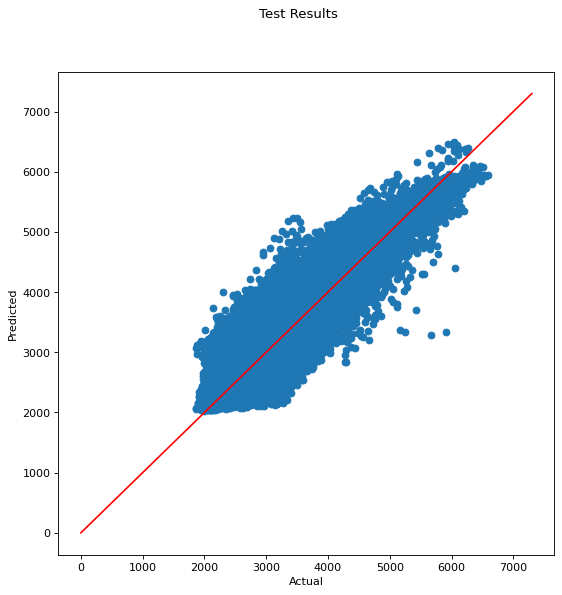

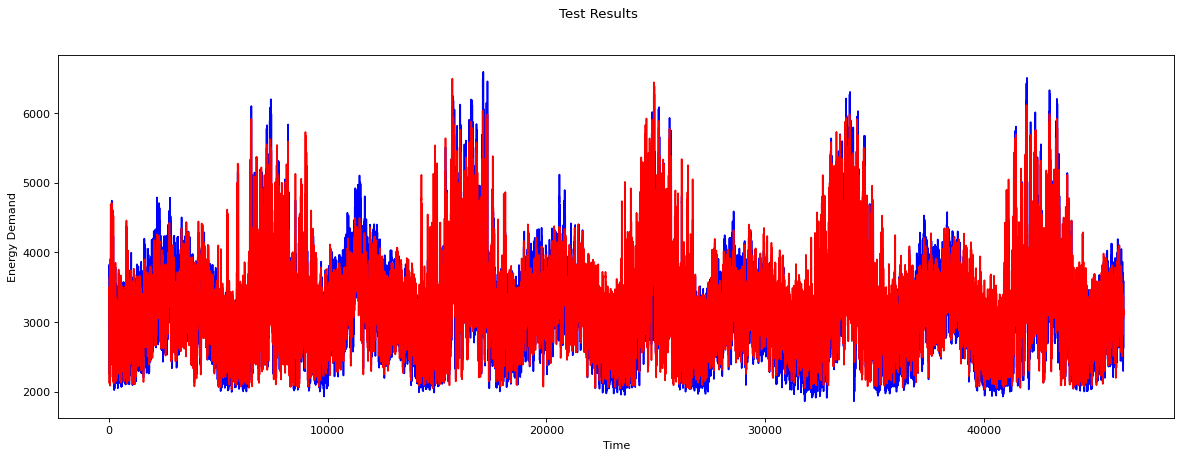

In [ ]:
# show scatterplots of actual vs. predicted for train and test
# make a prediction
pred = model.predict(X_test)# the pred

# calculate MSE for the baseline model
from sklearn.metrics import mean_absolute_error
print('MAE: ', mean_absolute_error(y_test, pred))

figure(figsize=(8, 8), dpi=80)
actual = y_test # the actual
plt.scatter(x=actual, y=pred)
x = np.linspace(0,7300) # 45 degree line from 0 to 25 (axes are the same)
plt.plot(x, x, color='red')
plt.suptitle('Test Results')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()
# looks pretty good!

# show timeseries plot on the train and validation data
figure(figsize=(18, 6), dpi=80)
plt.plot(np.arange(X_test.shape[0]), y_test, color='blue') # actual data
plt.plot(np.arange(X_test.shape[0]), pred, color='red') # predicted data
plt.suptitle('Test Results')
plt.xlabel('Time')
plt.ylabel('Energy Demand')
plt.show()

## RNN Model -2  

Training - 80K rows 
Test - 16K rows

Structure
1.   Two Recurrent layers
2.   One Convolution layer
3.   Drop out
4.   Max Pooling
5.   Activation Function





### Datasplit

In [ ]:
# split the data into train and test partitions
# we will use 50% of the data for train, and 50% for validation
train_pct_index = 80000
X_train, X_test = X[:train_pct_index], X[train_pct_index:]
y_train, y_test = y[:train_pct_index], y[train_pct_index:]

# pretty slick way of splitting your data using slicing!
# notice how we didn't do any shuffling (we don't want temporal leakage! keeps time series intact)

In [ ]:
# check the shape to be sure
print(X.shape, X_train.shape, X_test.shape)
print(y.shape, y_train.shape, y_test.shape)

# verify that this all adds up!
# 96404 samples with 24 lookback and 9 columns

(96404, 24, 9) (80000, 24, 9) (16404, 24, 9)
(96404,) (80000,) (16404,)


### Model Building

In [ ]:
# now let's build a model

# define
n_steps = X_train.shape[1]
n_features = X_train.shape[2]
kernel=3

# define model
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=kernel, input_shape=(n_steps,n_features))) # notice how input shape goes in first layer
model.add(MaxPooling1D(2))
model.add(SimpleRNN(64, activation='relu', return_sequences=True,recurrent_dropout=0.2))
model.add(SimpleRNN(120, activation='relu', 
                    recurrent_dropout=0.1))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse',metrics=['mae'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 22, 32)            896       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 11, 32)           0         
 )                                                               
                                                                 
 simple_rnn (SimpleRNN)      (None, 11, 64)            6208      
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 120)               22200     
                                                                 
 dropout (Dropout)           (None, 120)               0         
                                                                 
 dense (Dense)               (None, 1)                 121       
                                                        

In [ ]:
# Parameters
# Step 1
#Input (24*9)
print((9*3*32)+32)  # 9 features, 3 kernels and 32 feature maps and 32 biases
#Output(22*32)


# Step 2 (MAx Pooling 1D)
print("No parameter")
#Output(11*32)


# Step 3
print((64+32)*64+64)  # 64 Red Dots, 32 Green dots(Features) and 64 O.p hidden units and 64 biases
#Output(11*64)


# Step 4
print((120+64)*120+120)  # 120 Red Dots, 64 Green dots(Features) and 120 O/P hidden units and 120 biases
#Output(1*120)


# Step 5
print((120+1))  # 120 Red Dots and 1 64 biases
#Output(1*120)


896
No parameter
6208
22200
121


In [ ]:

es = EarlyStopping(monitor='val_loss', mode='min', 
                   patience=10, 
                   verbose=1,
                   restore_best_weights=True)

# fit model (uses early stopping)
model.fit(X_train, y_train, 
          epochs=500, 
          batch_size=5, 
          validation_split=0.2, # val is a random 20% of the data since we set shuffle = True
          verbose=1,
          callbacks=[es],
          shuffle=True)

Epoch 1/500
12800/12800 [==============================] - 116s 9ms/step - loss: 478780.7188 - mae: 541.8389 - val_loss: 218854.6719 - val_mae: 377.0375
Epoch 2/500
12800/12800 [==============================] - 106s 8ms/step - loss: 308068.9688 - mae: 441.5953 - val_loss: 230493.0312 - val_mae: 394.4172
Epoch 3/500
12800/12800 [==============================] - 109s 9ms/step - loss: 286416.1875 - mae: 422.9670 - val_loss: 212205.9531 - val_mae: 369.0374
Epoch 4/500
12800/12800 [==============================] - 111s 9ms/step - loss: 276225.0625 - mae: 413.8535 - val_loss: 116735.2734 - val_mae: 265.7413
Epoch 5/500
12800/12800 [==============================] - 106s 8ms/step - loss: 282319.1250 - mae: 415.1273 - val_loss: 187640.4688 - val_mae: 340.2108
Epoch 6/500
12800/12800 [==============================] - 110s 9ms/step - loss: 268421.8438 - mae: 408.8618 - val_loss: 296622.4688 - val_mae: 455.0313
Epoch 7/500
12800/12800 [==============================] - 105s 8ms/step - loss: 2

### Model Evaluation

513/513 [==============================] - 2s 5ms/step
MAE:  304.3174837876575


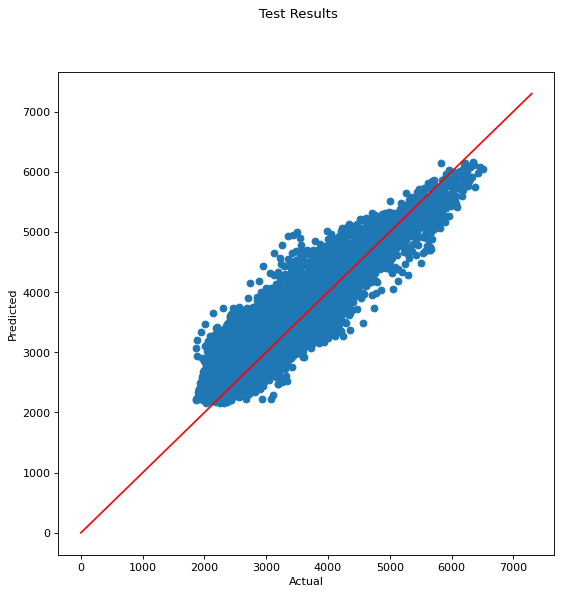

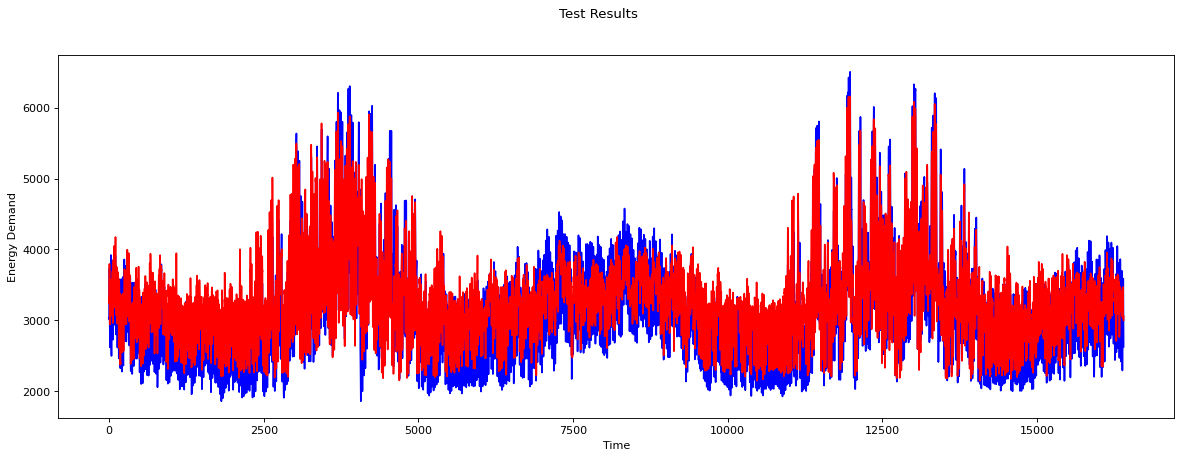

In [ ]:
# show scatterplots of actual vs. predicted for train and test
# make a prediction
pred = model.predict(X_test)# the pred

# calculate MSE for the baseline model
from sklearn.metrics import mean_absolute_error
print('MAE: ', mean_absolute_error(y_test, pred))

figure(figsize=(8, 8), dpi=80)
actual = y_test # the actual
plt.scatter(x=actual, y=pred)
x = np.linspace(0,7300) # 45 degree line from 0 to 25 (axes are the same)
plt.plot(x, x, color='red')
plt.suptitle('Test Results')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()
# looks pretty good!

# show timeseries plot on the train and validation data
figure(figsize=(18, 6), dpi=80)
plt.plot(np.arange(X_test.shape[0]), y_test, color='blue') # actual data
plt.plot(np.arange(X_test.shape[0]), pred, color='red') # predicted data
plt.suptitle('Test Results')
plt.xlabel('Time')
plt.ylabel('Energy Demand')
plt.show()

## Baseline Model
Create a baseline model using 24 hour lag data 

In [ ]:
# baseline model - prediction is just the previous time step (a tough one to beat!)
df['Baseline'] = df['Demand'].shift(24)
df.head()

,BDL_tmpf,BDL_dwpf,BDL_relh,BDL_drct,BDL_sknt,BDL_p01i,BDL_alti,BDL_mslp,BDL_vsby,Demand,Baseline
8760,33.98,26.96,0.0,0.0,0.0,0.0,30.07,1018.5,6.0,3053.0,NaN
8761,33.98,26.96,0.0,0.0,0.0,0.0,30.07,1018.5,6.0,2892.0,NaN
8762,30.92,26.96,0.0,0.0,0.0,0.0,30.07,1018.6,6.0,2774.0,NaN
8763,30.02,26.06,0.0,0.0,0.0,0.0,30.09,1019.2,5.0,2710.0,NaN
8764,28.94,24.98,0.0,0.0,0.0,0.0,30.09,1019.1,5.0,2698.0,NaN


In [ ]:
df.tail()

,BDL_tmpf,BDL_dwpf,BDL_relh,BDL_drct,BDL_sknt,BDL_p01i,BDL_alti,BDL_mslp,BDL_vsby,Demand,Baseline
78855,48.0,45.0,89.29,190.0,7.0,0.0,29.95,1014.2,6.0,3310.60,3508.60
78856,48.0,46.0,92.74,190.0,5.0,0.0,29.95,1013.8,5.0,3148.00,3369.02
78857,48.0,46.0,92.74,170.0,7.0,0.0,29.94,1013.5,5.0,2988.93,3176.76
78858,46.9,46.4,100.00,180.0,7.0,0.0,29.94,1013.8,5.0,2793.70,2936.60
78859,48.0,46.0,92.74,160.0,5.0,0.0,29.94,1013.3,4.0,2629.35,2692.52


In [ ]:
# if you wanted to see how this model does, use df['Baseline'] for the pred
# here's how I'd do it
y_test_baseline = df['Baseline'].tail(y_test.shape[0])
# check your work
y_test_baseline.shape

(46404,)

In [ ]:
# check shapes, looks good!
y_test.shape

(46404,)

MAE:  239.2162805146108


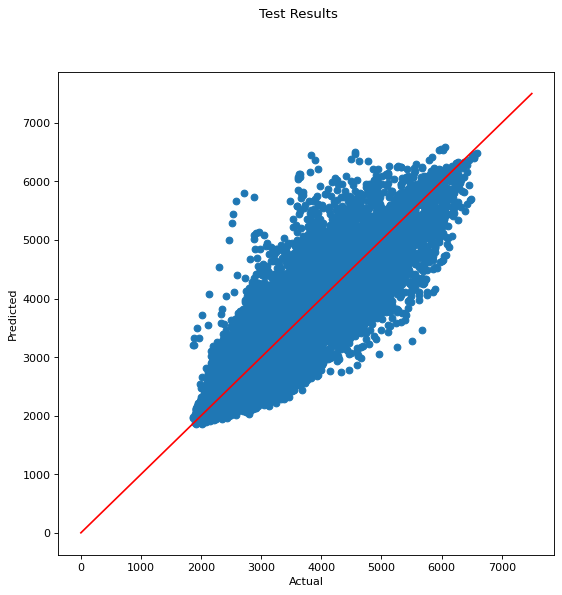

In [ ]:
# show scatterplots of actual vs. predicted for train and test
# make a prediction
pred = y_test_baseline # the pred
actual = y_test # the actual

# calculate MSE for the baseline model
from sklearn.metrics import mean_absolute_error
print('MAE: ', mean_absolute_error(y_test, pred))


figure(figsize=(8, 8), dpi=80)
plt.scatter(x=actual, y=pred)
x = np.linspace(0,7500) # 45 degree line from 0 to 25 (axes are the same)
plt.plot(x, x, color='red')
plt.suptitle('Test Results')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()
# looks pretty good!

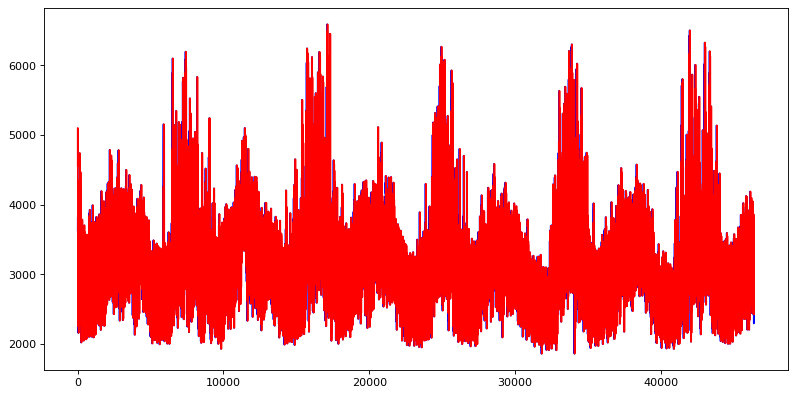

In [ ]:
# show timeseries plot on the train and validation data
figure(figsize=(12, 6), dpi=80)
plt.plot(np.arange(X_test.shape[0]), y_test, color='blue') # actual data
plt.plot(np.arange(X_test.shape[0]), pred, color='red') # predicted data
plt.show()


In [ ]:
# calculate MSE for the baseline model
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, pred)

239.2162805146108

## Findings

1.   When compared with Baseline model, RNN-Model 1 is not performing better than baseline model. MAE value is 18% (282-239)/239) better in Baseline model 
2.   And model 2, it is performing worse than baseline and also model 1 with values of Loss and MAE higher than other models



## Conclusions



1.   This assignment helped me understand how to interpret kernel filter as a function of Lookback factor. Kernel can be used not only for image processing but has various use cases and in the time series, it is 1D filtering
2.   Next time, 
  *   I will iterate on Lookback values by considering last week same time or last year same time. This will help model to learn entire year of seasonality and might have more robust model as one year of data could cover all edge cases
  *   In addition, I will also create additional variable which represents week of the day. As during weekends, energy consumption might be high. So having a weekday variable(0=Sunday and 6= Friday) will probably give us better results

3.   Walk Forward validation - Having a hold out sample always helps in finding how the model is performing with a unknown dataset. However, in this example model 1 performed better than model 2. (i.e. model with lower training size learned better than other one). Walk forward validation method didnot work as expected when we compare with Baseline models
4.   Learning of the model depends on Lookback value as model tries to learn better if there is a possible pattern over the course of time or during regular intervals(seasonality)
5.   Through this exercise, I found that RNN model tries to learn from all the rows with introduction of non-linearity and dropout. So, it might not be possible for the model to predict much highs/lows and most of the time, model values would be oscillating around the moving average





### References

https://stackabuse.com/solving-sequence-problems-with-lstm-in-keras/

https://towardsdatascience.com/animated-rnn-lstm-and-gru-ef124d06cf45

https://deepsense.ai/keras-or-pytorch/#:~:text=Keras%20and%20PyTorch%20are%20open,or%20MXNet%20

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.resample.html

https://benalexkeen.com/resampling-time-series-data-with-pandas/

https://tsfresh.readthedocs.io/en/latest/text/quick_start.html

https://tsfresh.readthedocs.io/en/latest/text/list_of_features.html

